## Visualizing the Efffect of Weather on Mosquito Populations

Import data and set date index

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import math
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# train = pd.read_csv('./predict-west-nile-virus/train_cleaned.csv')
# weather = pd.read_csv('./predict-west-nile-virus/weather_clean.csv')

In [7]:
merged = pd.read_csv('./dataset/merged_data.csv',index_col='Unnamed: 0')

In [12]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration,midpt_Lat,midpt_Lon,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09


In [9]:
merged['Spray Date'] = pd.to_datetime(merged['Spray Date'])
merged['Test Date'] = pd.to_datetime(merged['Test Date'])

In [6]:
# merged.set_index('Date', inplace=True)

### EDA on weather data

#### Visualizations: Temperature

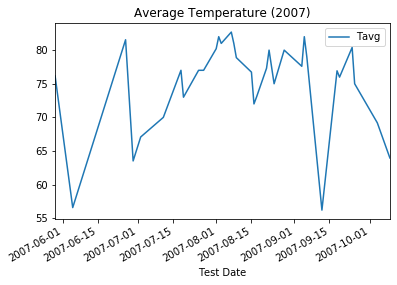

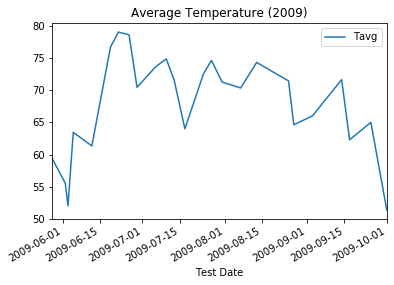

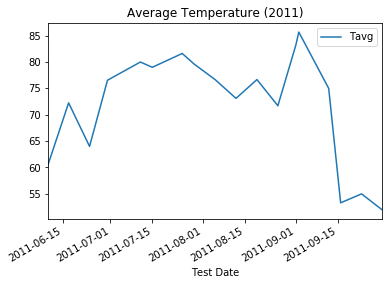

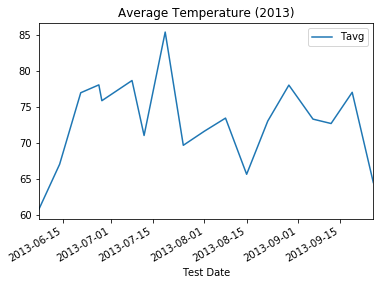

In [14]:
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2007'].plot(title='Average Temperature (2007)')
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2009'].plot(title='Average Temperature (2009)')
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2011'].plot(title='Average Temperature (2011)')
merged.groupby(merged['Test Date']).agg({'Tavg': np.mean})['2013'].plot(title='Average Temperature (2013)')

#### Visualizations: Factors that Affect Number of Mosquitos

In [25]:
merged.columns

Index(['Test Date', 'Species', 'Trap', 'AddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Station',
       'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Year', 'Month', 'Day', 'DaylightDuration', 'midpt_Lat', 'midpt_Lon',
       'Spray Date'],
      dtype='object')

In [47]:
Tavg_vs_NumMossie = merged.groupby('Tavg')['NumMosquitos'].sum()

In [51]:
Tavg_vs_NumMossie.head()

Tavg
50     80
51    127
52    853
53     57
54    723
Name: NumMosquitos, dtype: int64

Text(0.5, 1.0, 'Temperature vs. Number of Mosquitos')

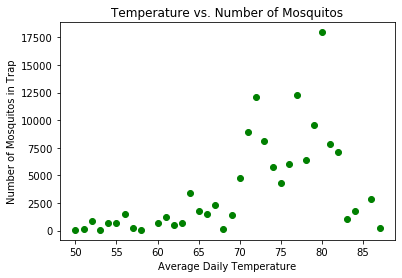

In [52]:
plt.scatter(merged.groupby('Tavg')['NumMosquitos'].sum().index, merged.groupby('Tavg')['NumMosquitos'].sum().values, c='g')
plt.xlabel('Average Daily Temperature')
plt.ylabel('Number of Mosquitos in Trap')
plt.title('Temperature vs. Number of Mosquitos')

Text(0.5, 1.0, 'Min Temperature vs. Number of Mosquitos')

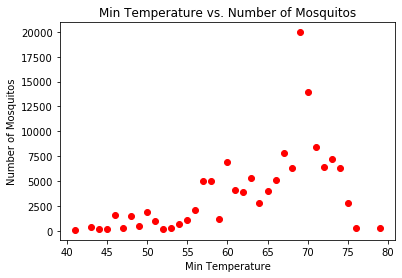

In [53]:
plt.scatter(merged.groupby('Tmin')['NumMosquitos'].sum().index, merged.groupby('Tmin')['NumMosquitos'].sum().values, c='r')
plt.xlabel('Min Temperature')
plt.ylabel('Number of Mosquitos')
plt.title('Min Temperature vs. Number of Mosquitos')

Text(0.5, 1.0, 'Sunrise Time vs. Number of Mosquitos')

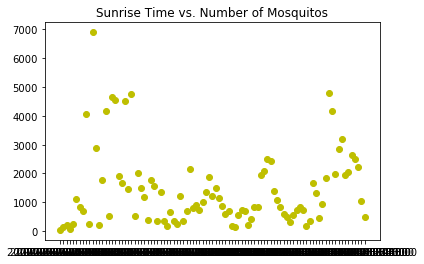

In [54]:
plt.scatter(merged.groupby('Sunrise')['NumMosquitos'].sum().index, merged.groupby('Sunrise')['NumMosquitos'].sum().values, c='y')
plt.title('Sunrise Time vs. Number of Mosquitos')

Text(0.5, 1.0, 'Sunset Time vs. Number of Mosquitos')

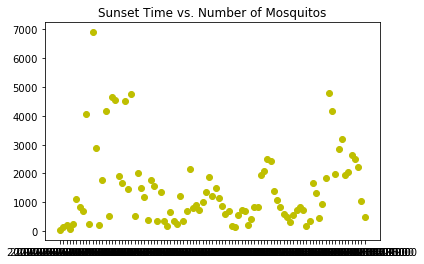

In [55]:
plt.scatter(merged.groupby('Sunset')['NumMosquitos'].sum().index, merged.groupby('Sunset')['NumMosquitos'].sum().values, c='y')
plt.title('Sunset Time vs. Number of Mosquitos')

Text(0.5, 1.0, 'PrecipTotal vs. Number of Mosquitos')

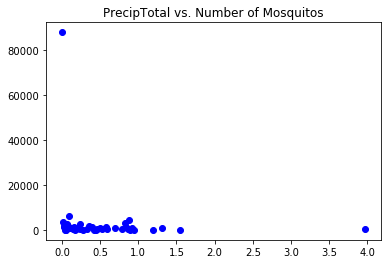

In [56]:
plt.scatter(merged.groupby('PrecipTotal')['NumMosquitos'].sum().index, merged.groupby('PrecipTotal')['NumMosquitos'].sum().values, c='b')
plt.title('PrecipTotal vs. Number of Mosquitos')

In [57]:
# plt.scatter(merged.PrecipTotal, merged.NumMosquitos, c='b')

### Occurrences of WNV over Time

In [59]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration,midpt_Lat,midpt_Lon,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09


In [68]:
merged_2007 = merged[merged['Year'] == 2007].set_index('Test Date')
merged_2009 = merged[merged['Year'] == 2009].set_index('Test Date')
merged_2011 = merged[merged['Year'] == 2011].set_index('Test Date')
merged_2013 = merged[merged['Year'] == 2013].set_index('Test Date')

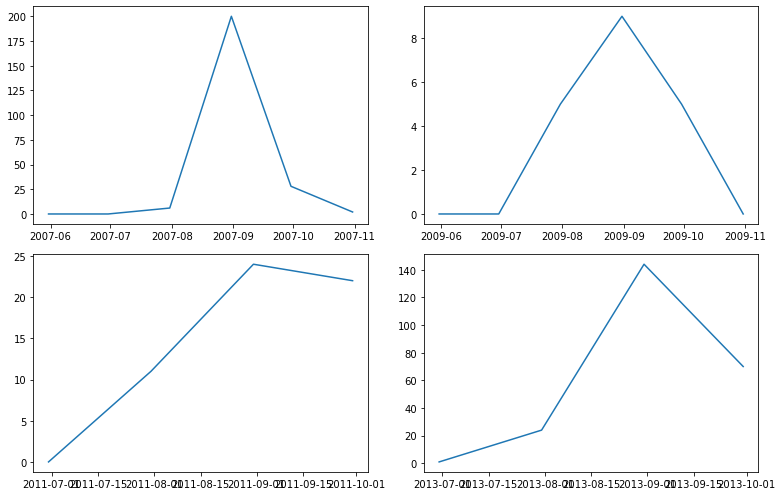

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
ax0, ax1, ax2, ax3 = axes.flat

ax0.plot(merged_2007[['WnvPresent']].resample('M').apply(sum))
ax1.plot(merged_2009[['WnvPresent']].resample('M').apply(sum))
ax2.plot(merged_2011[['WnvPresent']].resample('M').apply(sum))
ax3.plot(merged_2013[['WnvPresent']].resample('M').apply(sum))

plt.tight_layout()

In [70]:
merged.head()

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month,Day,DaylightDuration,midpt_Lat,midpt_Lon,Spray Date
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
1,2007-05-29,CULEX RESTUANS,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.957809,-87.780646,2013-08-16
2,2007-05-29,CULEX RESTUANS,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
4,2007-05-29,CULEX RESTUANS,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,1,88,60,74,10,58,65,0,9,2007-05-29 04:21:00,2007-05-29 19:17:00,BR HZ,0,0.0,0.0,29.39,30.11,5.8,18,6.5,2007,5,29,0 days 14:56:00.000000000,41.982275,-87.809953,2011-07-09
